# Sequential Autoencoder

We will use MNIST dataset and keras library to create Sequential Autoencoder

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For data processing and maths
import numpy as np
import pandas as pd
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
# for deep learning

import tensorflow as tf
from keras.layers import Input, Dense # dense or fully connected layer
from keras.models import Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,keras,tensorflow,numpy,seaborn, matplotlib

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
pandas 0.23.4
keras 2.2.4
tensorflow 1.13.1
numpy 1.16.2
seaborn 0.9.0
matplotlib 2.1.0
Wed Oct 16 16:59:11 2019 W. Europe Daylight Time

# 2)- Define Model

In [7]:
model=Sequential()

# Adding layers for encoder
model.add(Dense(128,activation='relu' , input_dim=784))
model.add(Dense(64,activation='relu'))

# for decoder layer
model.add(Dense(128,activation='relu' , input_dim=784))
model.add(Dense(784,activation='sigmoid'))

# 3)- Compile the model

In [8]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

# 4) Load Dataset

We are not interested in y-labels as encoder has X input and same is its output

In [9]:
(X_train, _), (X_test, _) = mnist.load_data()

In [10]:
# normalize 
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
# reset to single dimension
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# 5)- Train the model

In [13]:
model.fit(X_train, X_train, epochs=50, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.3373
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2516
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2201
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1997
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1857
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1733
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1638
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1566
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1502
Epoch 10/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1451
Epoch 11/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1408
Epoc

In [14]:
out_imgs = model.predict(X_test, batch_size=256)

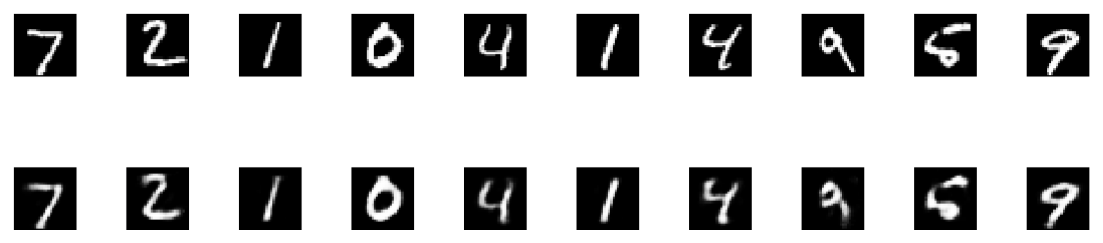

In [15]:
plt.figure(figsize=(40,4))

for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(out_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()